In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Define constants
ON = 255
OFF = 0
vals = [ON, OFF]

In [3]:
def randomGrid(N):
    """ returns a grid of N x N values """
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

In [4]:
def addGlider(i, j, grid):
    """ adds a glider with top-left cell at (i, j)"""
    glider = np.array([[0, 0, 255],
                       [255, 0, 255],
                       [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider

In [5]:
def update(framenum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neighbor sum using toroidal boundary conditions
            # x and y wrap around so that the simulation
            # takes place on a toroidal surface
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

# Original Python Script
## main function
def main():
    # command line arguments are in sys.argv[1], sys.argv[2], ...
    # sys.argv[0] is the script name and can be ignored
    # parse arguments
    parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    # add arguments
    parser.add_argument('--grid-size', dest='N', required=False)
    parser.add_argument('--mov-file', dest='movfile', required=False)
    parser.add_argument('--interval', dest='interval', required=False)
    parser.add_argument('--glider', action='store_true', required=False)
    parser.add_argument('--gosper', action='store_true', required=False)
    args = parser.parse_args()
    
    # set grid size
    N = 100
    if args.N and int(args.N) > 8:
        N = int(args.N)
        
    # set the animation update interval
    updateInterval = 50
    if args.interval:
        updateInterval = int(args.interval)
        
    # declare grid
    grid = np.array([])
    # check if "glider" demo flag is specified
    if args.glider:
        grid = np.zeros(N*N).reshape(N, N)
        addGlider(1, 1, grid)
    else:
        # populate grid with random on/off - more off than on
        grid = randomGrid(N)
        
    # set up the animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    # I changed the number of frames from 10 to 100 in the next line.
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                  frames = 100,
                                  interval = updateInterval,
                                  save_count = 50)
    
    # number of frames?
    # set the output file
    # I added the next two lines to get script to work.
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

    if args.movfile:
        # The line below is from the book, and seems to be causing file I/O errors
        #ani.save(args.movfile, fps=30, extra_args=['-vcoded', 'libx264'])
	# I replaced the line above with the one below to get the script to work.
        ani.save(args.movfile, writer=writer)
    plt.show()

In [6]:
# Set Grid Size (N)
N = 100

In [7]:
# Set Update Interval (updateInterval)
updateInterval = 50

In [8]:
# Declare Grid
grid = np.array([])

In [9]:
# populate grid with random on/off - more off than on
grid = randomGrid(N)

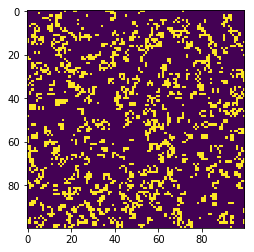

In [10]:
# set up the animation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
# I changed the number of frames from 10 to 100 in the next line.
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                            frames = 100,
                            interval = updateInterval,
                            save_count = 50)

In [11]:
# number of frames?
# set the output file
# I added the next two lines to get script to work.
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [12]:
# Show the animation
#plt.show()

In [13]:
from IPython.display import HTML
HTML(ani.to_jshtml())